In [32]:
from bs4 import BeautifulSoup
import requests

url = 'https://gahanaonline.com/gold-rate-history/'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
print(soup)

<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-US"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-US"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie10 lt-ie9" lang="en-US"> <![endif]-->
<!--[if IE 9]>         <html class="no-js lt-ie10" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-US">
<!--<![endif]-->
<head><style>img.lazy{min-height:1px}</style><link as="script" href="https://gahanaonline.com/wp-content/plugins/w3-total-cache/pub/js/lazyload.min.js" rel="preload"/>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<link href="https://gahanaonline.com/xmlrpc.php" rel="pingback"/>
<script>document.documentElement.className = document.documentElement.className + ' yes-js js_active js'</script>
<title

In [33]:
table_codes = soup.table
table_codes

<table style="height: 1013px" width="660">
<thead>
<tr>
<td style="text-align: center"><strong>Date in A.D</strong></td>
<td style="text-align: center"><strong>Date In B.S</strong></td>
<td style="text-align: center"><strong>Gold Rate Per Tola </strong></td>
</tr>
<tr>
<td style="text-align: center"><strong>06/06/2024</strong></td>
<td style="text-align: center"><strong>02/24/2081</strong></td>
<td style="text-align: center"><strong>1,44,000/-</strong></td>
</tr>
<tr>
<td style="text-align: center"><strong>06/05/2024</strong></td>
<td style="text-align: center"><strong>02/23/2081</strong></td>
<td style="text-align: center"><strong>1,42,200/-</strong></td>
</tr>
<tr>
<td style="text-align: center"><strong>06/04/2024</strong></td>
<td style="text-align: center"><strong>02/22/2081</strong></td>
<td style="text-align: center"><strong>1,42,700/-</strong></td>
</tr>
<tr>
<td style="text-align: center"><strong>06/03/2024</strong></td>
<td style="text-align: center"><strong>02/21/2081</strong

In [34]:
tags = table_codes.find_all('tr')
tags

[<tr>
 <td style="text-align: center"><strong>Date in A.D</strong></td>
 <td style="text-align: center"><strong>Date In B.S</strong></td>
 <td style="text-align: center"><strong>Gold Rate Per Tola </strong></td>
 </tr>,
 <tr>
 <td style="text-align: center"><strong>06/06/2024</strong></td>
 <td style="text-align: center"><strong>02/24/2081</strong></td>
 <td style="text-align: center"><strong>1,44,000/-</strong></td>
 </tr>,
 <tr>
 <td style="text-align: center"><strong>06/05/2024</strong></td>
 <td style="text-align: center"><strong>02/23/2081</strong></td>
 <td style="text-align: center"><strong>1,42,200/-</strong></td>
 </tr>,
 <tr>
 <td style="text-align: center"><strong>06/04/2024</strong></td>
 <td style="text-align: center"><strong>02/22/2081</strong></td>
 <td style="text-align: center"><strong>1,42,700/-</strong></td>
 </tr>,
 <tr>
 <td style="text-align: center"><strong>06/03/2024</strong></td>
 <td style="text-align: center"><strong>02/21/2081</strong></td>
 <td style="text-

In [35]:
list_data = []
for i in tags:
  list_data.append(i.text.split('\n')[1:])
# list_data

In [36]:
cleaned_data = []
for j in list_data:
  if j[0] != "":
    cleaned_data.append(j)

# cleaned_data


In [37]:
import csv
file = open('gold_price_in_nepal.csv','w')
x = csv.writer(file)
x.writerows(cleaned_data)
file.close()

In [38]:
import pandas as pd
df = pd.read_csv('gold_price_in_nepal.csv',encoding='latin1')
df

,Date in A.D,Date In B.S,Gold Rate Per Tola,Unnamed: 3
0,06/06/2024,02/24/2081,"1,44,000/-",NaN
1,06/05/2024,02/23/2081,"1,42,200/-",NaN
2,06/04/2024,02/22/2081,"1,42,700/-",NaN
3,06/03/2024,02/21/2081,"1,41,000/-",NaN
4,06/02/2024,02/20/2081,"1,42,000/-",NaN
...,...,...,...,...
232,08/25/2023,05/08/2080,"1,11,100/-",NaN
233,08/24/2023,05/07/2080,"1,11,100/-",NaN
234,08/23/2023,05/06/2080,"1,10,600/-",NaN
235,08/22/2023,05/05/2080,"1,10,500/-",NaN


In [39]:
print(df.columns)


Index(['Date in A.D', 'Date In B.S', 'Gold Rate Per Tola ', 'Unnamed: 3'], dtype='object')


In [40]:
df.columns = df.columns.str.strip()


In [41]:
df1 = df[['Date in A.D','Date In B.S','Gold Rate Per Tola']].iloc[0:10]
df1['Gold Rate Per Tola'] = df1['Gold Rate Per Tola'].str.replace(',', '').str.replace('/-', '').astype(int)
df1

,Date in A.D,Date In B.S,Gold Rate Per Tola
0,06/06/2024,02/24/2081,144000
1,06/05/2024,02/23/2081,142200
2,06/04/2024,02/22/2081,142700
3,06/03/2024,02/21/2081,141000
4,06/02/2024,02/20/2081,142000
5,05/31/2024,02/18/2081,142200
6,05/30/2024,02/17/2081,140500
7,05/29/2024,02/16/2081,138200
8,05/28/2024,02/15/2081,137600
9,05/27/2024,02/14/2081,137200


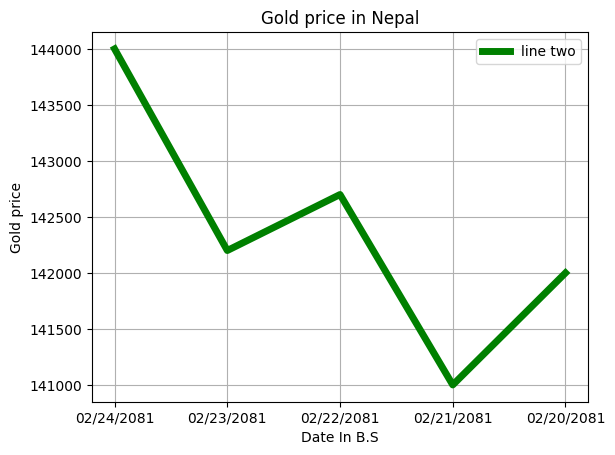

In [42]:
from matplotlib import pyplot as plt
plt.plot(df1['Date In B.S'].iloc[0:5],df1['Gold Rate Per Tola'].iloc[0:5],'g',label='line two',linewidth=5)
plt.title('Gold price in Nepal')
plt.ylabel('Gold price')
plt.xlabel('Date In B.S')
plt.legend()
plt.grid(True)
plt.show()
